In [5]:
from brian2 import *
%matplotlib inline
import numpy as np
import pytime

def visualize_Hypercolumn(mfr, n, FR):

    titles = [r'Vertical, $\theta=0°$', r'Horizontal, $\theta=90°$', r'ACW from vertical, $\theta=45°$', r'CW from vertical, $\theta=-45°$']
    nL = n**2
    
    for ii in range(4):
        
        a = asarray(mfr[nL*ii : nL*(ii+1)]/FR)
        b = a.reshape(n,n)
        
        plt.subplot(2,2,ii+1)
        plt.imshow(b,cmap='gray')
        plt.colorbar()
        plt.xticks([])
        plt.yticks([])
        plt.title(titles[ii])
    
n = 28
nL1 = nL2 = n**2
nL3 = nL1*4

[X,Y] = np.meshgrid(range(n), range(n))

taum = 10*ms
taui = 50*ms
duration = 500*ms

eqsPOISSON='''
rates : Hz
x : 1 (constant)
y : 1 (constant)
'''

eqsLGN='''
dv/dt  = (ge+gi-v)/taum : volt (unless refractory)
dge/dt = -ge/taue : volt
dgi/dt = -gi/taui : volt
x : 1 (constant)
y : 1 (constant)
'''

eqsV1='''
dv/dt  = (ge+gi-v)/taum : volt (unless refractory)
dge/dt = -ge/taue : volt
dgi/dt = -gi/taui : volt
x : 1 (constant)
y : 1 (constant)
ori : 1 (constant)
'''

dge = 100*mV
MFR = []

TAUE = [5,10,50,100]*ms

for taue in TAUE:

    ################################################## Layer 1 ################################################################

    L1 = NeuronGroup(nL1,
                     eqsPOISSON,
                     threshold='rand()<rates*dt')

    L1.x = X.flatten()
    L1.y = Y.flatten()
    FR = 100*Hz
    pat = np.zeros((28,28))

    pat[3:6,4] = 1

    pat[23,3:6] = 1

    pat[3,22] = 1
    pat[4,23] = 1
    pat[5,24] = 1

    pat[24,22] = 1
    pat[23,23] = 1
    pat[22,24] = 1

    L1.rates = pat.flatten()*FR

    ################################################## Layer 2 ################################################################

    L2 = NeuronGroup(nL2,
                     eqsLGN,
                     threshold = 'v>0.3*volt',
                     reset = 'v=0*volt',
                     refractory = 5*ms,
                     method = 'euler')

    L2.x = X.flatten()
    L2.y = Y.flatten()

    e1 = Synapses(L1, L2, on_pre='ge += dge')
    e1.connect(condition = 'i==j')

    i1 = Synapses(L1, L2, on_pre='gi -= 1/8*dge')
    i1.connect(condition = 'sqrt((x_pre-x_post)**2+(y_pre-y_post)**2)<2 and i!=j')

    ################################################## Layer 3 ################################################################

    L3 = NeuronGroup(nL3,
                     eqsV1,
                     threshold='v>0.3*volt',
                     reset='v=0*volt',
                     refractory=5*ms,
                     method='euler')

    L3.ori = np.repeat(np.array([0,1,2,3]), nL1)

    X3 = np.tile(X.flatten(), (1,4))
    X3.flatten()
    L3.x = X3.flatten()

    Y3 = np.tile(Y.flatten(), (1,4))
    Y3.flatten()
    L3.y = Y3.flatten()

    cond_range = 'abs(y_pre-y_post)<2 and abs(x_pre-x_post)<2 and ('

    cond_ver = 'ori_post==0 and x_pre==x_post or '
    cond_hor = 'ori_post==1 and y_pre==y_post or '
    cond_CW = 'ori_post==2 and -x_pre+x_post+y_pre-y_post<1 and -x_pre+x_post+y_pre-y_post>-1 or '
    cond_ACW = 'ori_post==3 and x_pre-x_post+y_pre-y_post<1 and x_pre-x_post+y_pre-y_post>-1)'
    condV1be = cond_range + cond_ver + cond_hor + cond_CW + cond_ACW

    cond_ver = 'ori_post==0 and x_pre!=x_post or '
    cond_hor = 'ori_post==1 and y_pre!=y_post or '
    cond_CW = 'ori_post==2 and -x_pre+x_post+y_pre-y_post>=1 and -x_pre+x_post+y_pre-y_post<=-1 or '
    cond_ACW = 'ori_post==3 and x_pre-x_post+y_pre-y_post>=1 and x_pre-x_post+y_pre-y_post<=-1)'
    condV1bi = cond_range + cond_ver + cond_hor + cond_CW + cond_ACW

    e2 = Synapses(L2, L3, on_pre='ge += 1/3*dge')
    e2.connect(condition = condV1be)

    #i2 = Synapses(L2, L3, on_pre='gi -= 1/6*dge')
    #i2.connect(condition = condV1bi)

    sp1 = SpikeMonitor(L1)
    sp2 = SpikeMonitor(L2)
    sp3 = SpikeMonitor(L3)

    run(duration)

    MFR1 = sp1.count/duration
    MFR2 = sp2.count/duration
    MFR3 = sp3.count/duration
    MFR.append(MFR3)

## Case B) dge = 50 mV

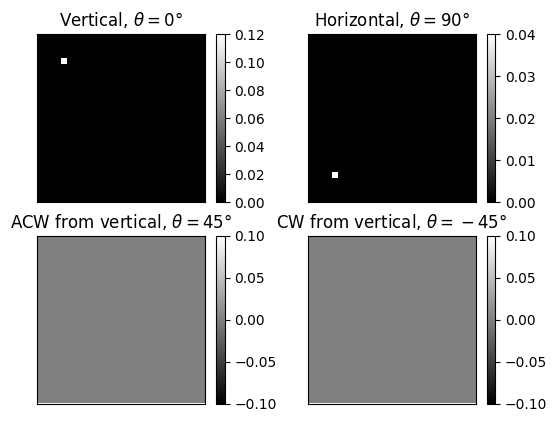

In [9]:
visualize_Hypercolumn(MFR[0], n, FR)

## Case B) dge = 100 mV

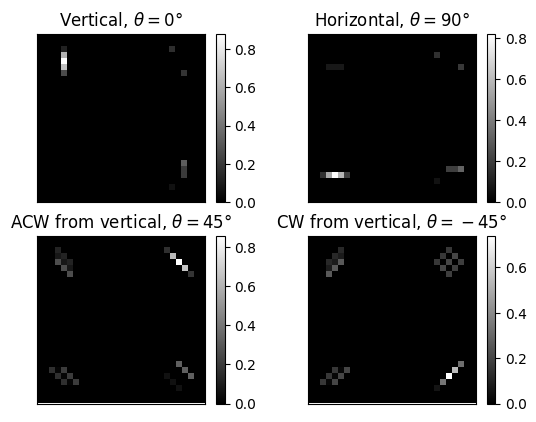

In [10]:
visualize_Hypercolumn(MFR[1], n, FR)

## Case C) dge = 200 mV

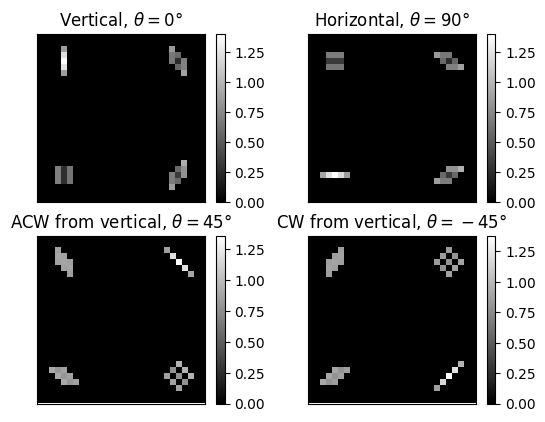

In [11]:
visualize_Hypercolumn(MFR[2], n, FR)

## Case D) No lateral inhibition (dge = 50,100, 200 mV)

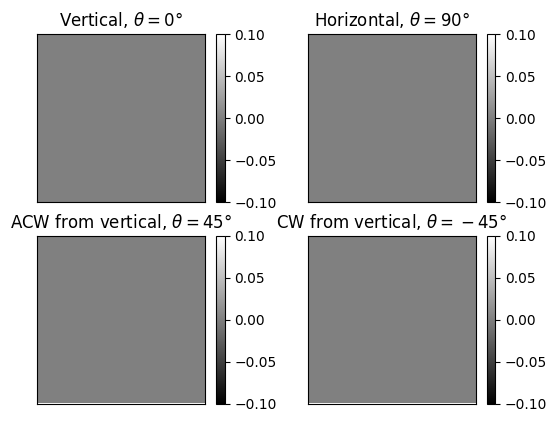

In [2]:
visualize_Hypercolumn(MFR[0], n, FR)

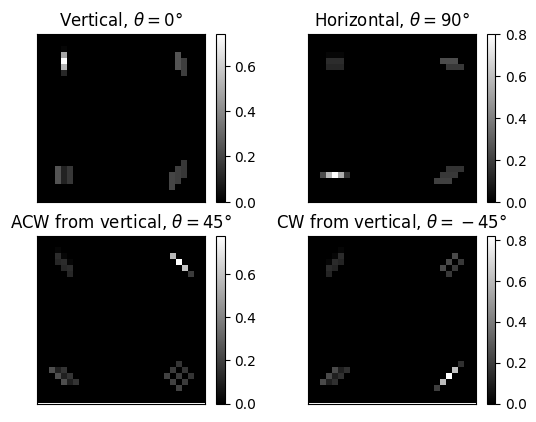

In [3]:
visualize_Hypercolumn(MFR[1], n, FR)

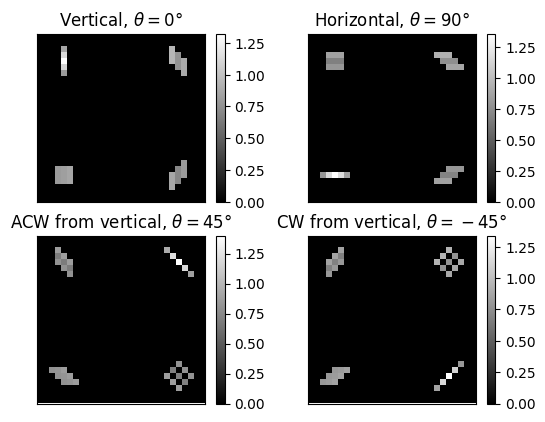

In [4]:
visualize_Hypercolumn(MFR[2], n, FR)

## Case E) $\tau_e = 5, 10, 50, 100 ms$

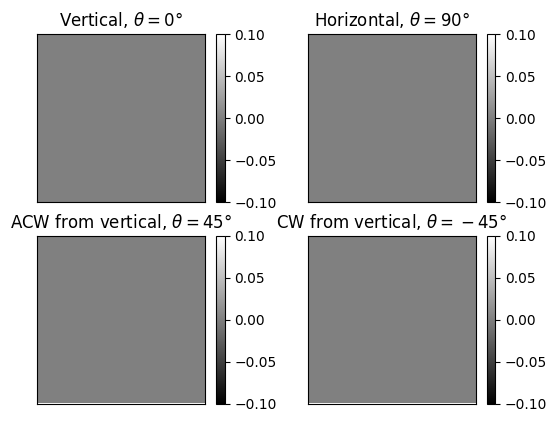

In [6]:
visualize_Hypercolumn(MFR[0], n, FR)

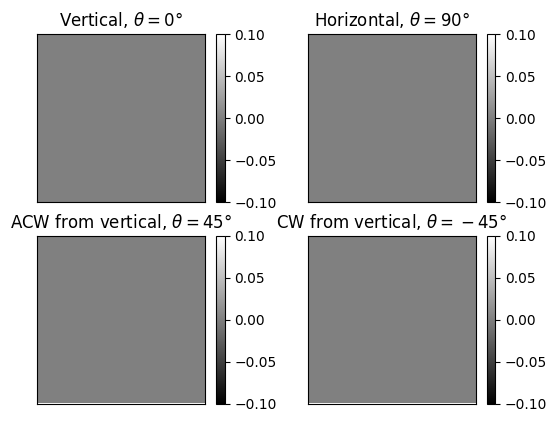

In [7]:
visualize_Hypercolumn(MFR[1], n, FR)

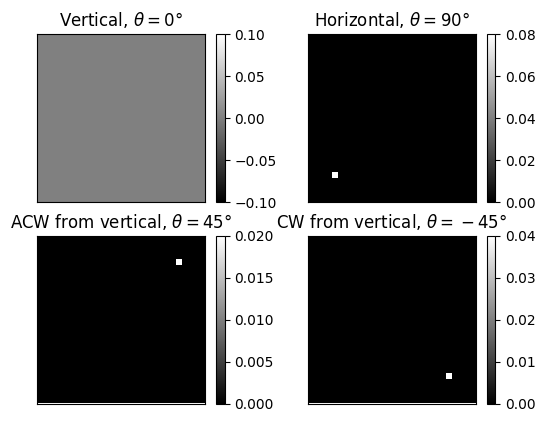

In [8]:
visualize_Hypercolumn(MFR[2], n, FR)

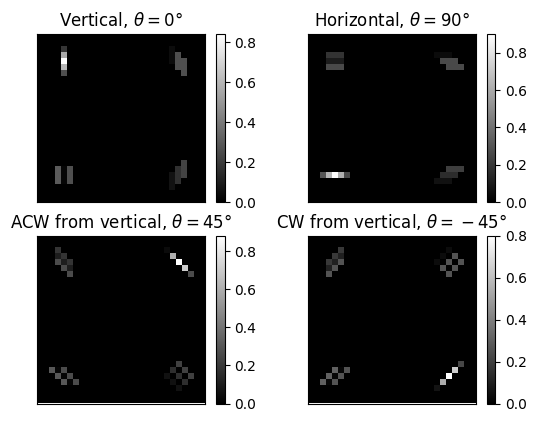

In [9]:
visualize_Hypercolumn(MFR[3], n, FR)